In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = np.load('one_image.npy')

In [ ]:
data.shape

(3, 1080, 1080)

In [ ]:
fl = data[0]
bf = data[1]
mask = data[2]

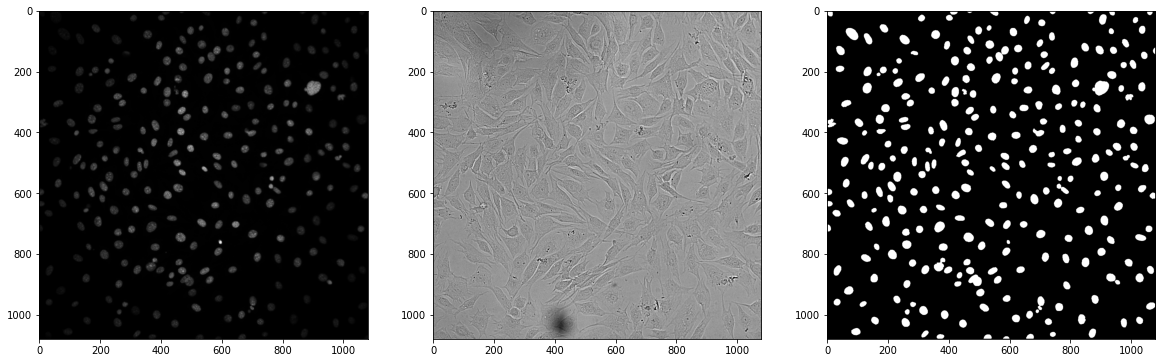

In [ ]:

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(fl.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(bf.squeeze(), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(mask.squeeze(), cmap='gray')
# print(mask.shape)

In [ ]:
flgr = fl.astype(np.uint8)
bfgr = bf.astype(np.uint8)

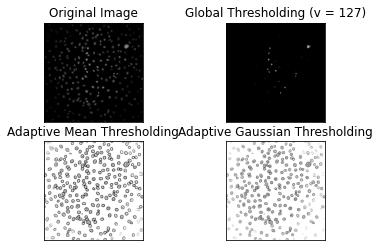

In [ ]:
img = flgr
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

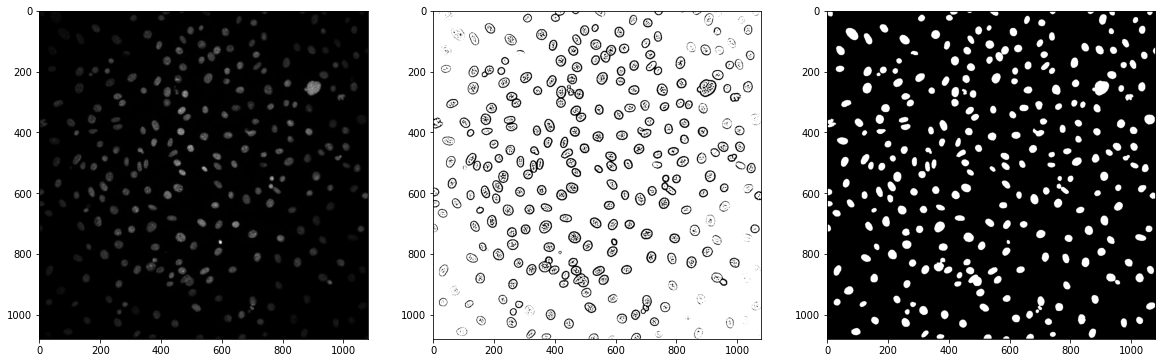

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(flgr.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(th3.squeeze(), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(mask.squeeze(), cmap='gray')

In [ ]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
# images = [img, 0, th1,
#           img, 0, th2,
#           blur, 0, th3]
# titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#           'Original Noisy Image','Histogram',"Otsu's Thresholding",
#           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
# for i in range(3):
#     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# plt.show()

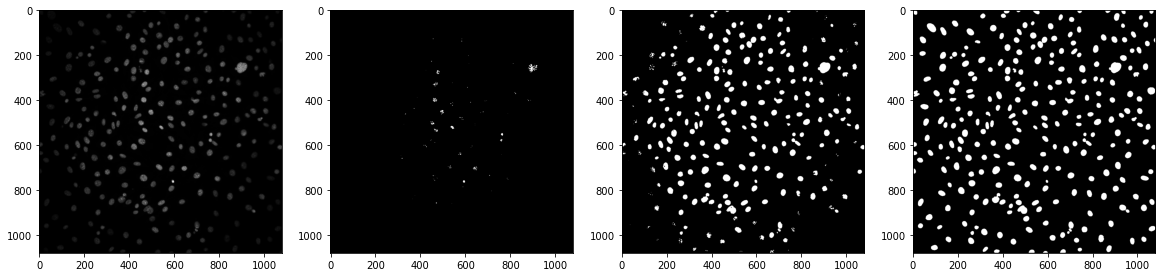

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 4, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(th1.squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(th2.squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(mask.squeeze(), cmap='gray')

In [ ]:
set(mask.flatten())

{0.0, 1.0}

In [ ]:

def iou_coef(component1, component2):
    component1 = np.array([[item / 255 for item in subl] for subl in component1])
    # component2 = np.array([[item / 255 for item in subl] for subl in component2])
    overlap = component1 * component2 # Logical AND
    print("oVERLAP", overlap.sum())
    union = component1 + component2 - overlap# Logical OR
    print("Union", union.sum())
    return overlap.sum()/float(union.sum())

In [ ]:
iou_coef(th2, mask)

oVERLAP 83928.0
Union 127858.0


0.6564157111795899

In [ ]:
a = np.array([[0,0,255], [0,255, 0], [255,255, 0]])
b = np.array([[0,0,255], [0,255, 0], [0,255, 255]])

In [ ]:
a

array([[  0,   0, 255],
       [  0, 255,   0],
       [255, 255,   0]])

In [ ]:
b

array([[  0,   0, 255],
       [  0, 255,   0],
       [  0, 255, 255]])

In [ ]:
[[item / 255 for item in subl] for subl in a]

[[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 1.0, 0.0]]

In [ ]:
iou_coef(a, b)

oVERLAP 3.0
Union 5.0


0.6